# Compresión de imágenes

In [55]:
# Paquetes con los que vamos a trabajar hoy
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from numpy.linalg import norm

## La imagen de la clase práctica

Graficamos la matriz $A$ en blanco y negro.

Tomamos el valor 1 como blanco y el 0 como negro.

In [2]:
A= np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
])
print(np.shape(A))

(12, 10)


¿Cuántas entradas se guardan de la matriz $A$?

In [4]:
12*10

120

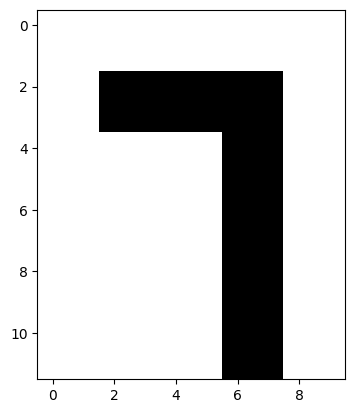

In [5]:
plt.imshow(A, cmap = "gray")

¿Cuál es el rango máximo que puede tener $A$?

¿Cuántas filas distintas tiene $A$? ¿Cuántas columnas distintas tiene $A$?

¿Cuál es la cantidad máxima de valores singulares no nulos que puede tener $A$?

Consideremos $A= U \Sigma V^t$ una descomposición en valores singulares.
A partir de estas respuestas, podemos darnos una idea estimada de cuántas columnas de $U$ y $V$ podemos descartar sin perder información.

### Valores singulares

In [6]:
# Calculamos la descomposición en valores singulares
[U, S, Vh] = np.linalg.svd(A)
print("Tamaño de U = ", np.shape(U))
print("Tamaño de S = ", np.shape(S))
print("Tamaño de Vh = ", np.shape(Vh))

Tamaño de U =  (12, 12)
Tamaño de S =  (10,)
Tamaño de Vh =  (10, 10)


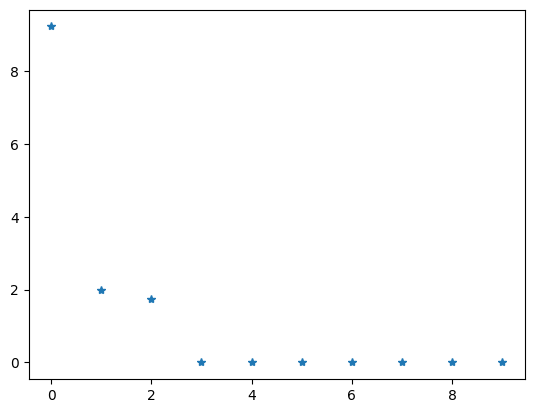

In [7]:
# Graficamos los valores singulares
plt.plot(S, '*')

In [8]:
# Observamos que hay 3 valores singulares no nulos. Lo verificamos.
print(S)

[9.21888296e+00 2.00000000e+00 1.73556819e+00 4.82144191e-16
 9.44304732e-17 3.05300435e-17 7.08354485e-31 3.23815183e-33
 1.61611865e-34 8.42238549e-51]


Para evitar los errores numéricos, definimos una función que elimine de $\Sigma$ los valores singulares pequeños, dejando solo los primeros $k$ valores.

In [9]:
# Función para eliminar de S los valores singulares a partir del k+1
# Toma como parámetro también A para saber el tamaño de Sigma.
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

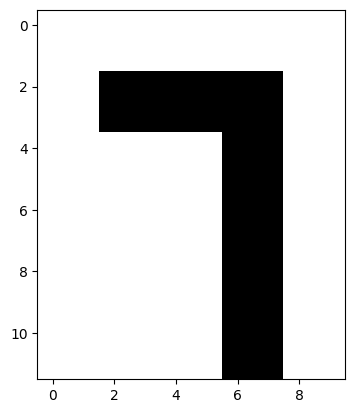

In [10]:
# Aplicamos la función para construir la matriz Sigma con 3 valores singulares no nulos
k = 3
S_trunc = truncateSigma(A, S, k)
A_3 = U @ S_trunc @ Vh
plt.imshow(A_3, cmap='gray')

### Descomposición en valores singulares reducida

Cuando $\Sigma$ tiene solo $k$ valores no nulos en la diagonal, podemos quedarnos con las primeras $k$ columnas de $U$ y las primeras $k$ columnas de $V$ (es decir, las primeras $k$ filas de $V^t$).

Obtenemos una descomposición que utiliza menos datos
$$
A = \tilde U \tilde \Sigma \tilde V^{*}
$$
con $\tilde U \in \mathbb{K}^{m \times k}$, $\tilde \Sigma \in \mathbb{K}^{k \times k}$, $\tilde V^{*} \in \mathbb{K}^{k \times n}$.

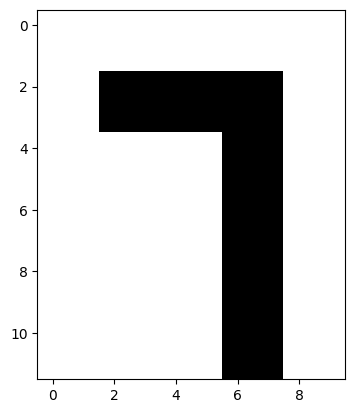

In [13]:
# Podemos construir A utilizando solo las primeras 3 columnas de U y 3 columnas de V (3 filas de Vh)
# y tomando solo la submatriz de 3x3 de S

k = 3
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

¿Cuántas columnas de $U$ y $V$ pudimos descartar sin que se modificara la imagen?

In [14]:
Ur = U[:,:k]
Vr = Vh[:k,]
Sr = S_trunc[:k,:k]
print("Dimensiones de la matriz U reducida:", np.shape(Ur))
print("Dimensiones de la matriz V reducida:",np.shape(Vr))
print("Dimensiones de la matriz Sigma reducida:",np.shape(Sr))


Dimensiones de la matriz U reducida: (12, 3)
Dimensiones de la matriz V reducida: (3, 10)
Dimensiones de la matriz Sigma reducida: (3, 3)


A partir de estos datos, calcular el porcentaje de compresión:

$$
\frac{\text{cantidad de entradas guardadas sin comprimir}}{\text{cantidad de entradas guardadas al comprimir}} \times 100
$$

¿Qué sucede con la imagen si en lugar de guardar tres valores singulares no nulos, conservamos solamente los primeros dos? 


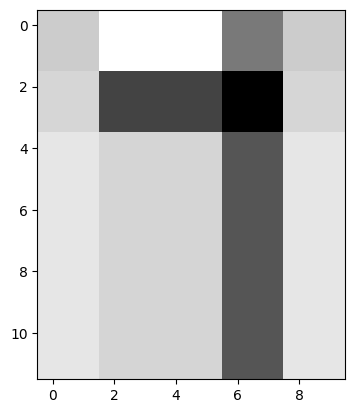

In [21]:
k = 2
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

## Compresión de la imagen de un árbol

Vamos a aplicar la misma estrategia para comprimir la imagen de un árbol con el agregado de convertir también a 0 los valores singulares pequeños. Si bien permite descartar más información, esto se traduce en una pérdida de calidad de la imagen.

(1082, 2000, 3)


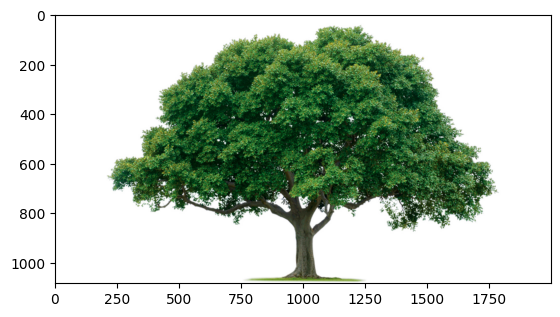

In [22]:
# Leemos el archivo
img = io.imread('tree2.jpg')
print(img.shape)

plt.imshow(img)

(1082, 2000)


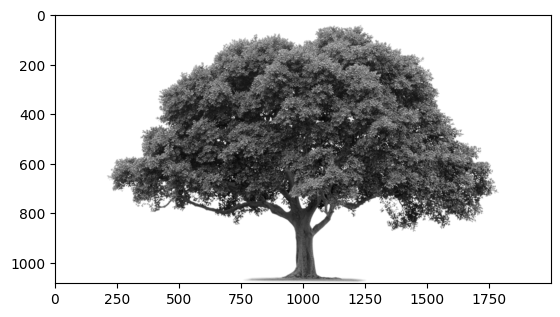

In [23]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')


Calculemos una descomposición SVD de $A$ y grafiquemos los valores singulares.

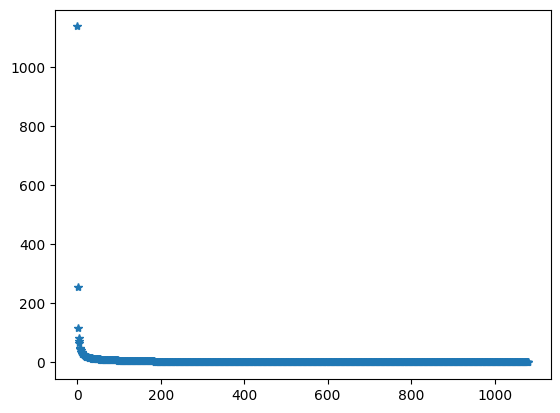

In [24]:
A = imgGray
[U, S, Vh] = np.linalg.svd(A)
plt.plot(S, '*')

Es difícil diferenciar a partir de qué índice los valores singulares se vuelven pequeños. Para eso, calculamos su logaritmo.

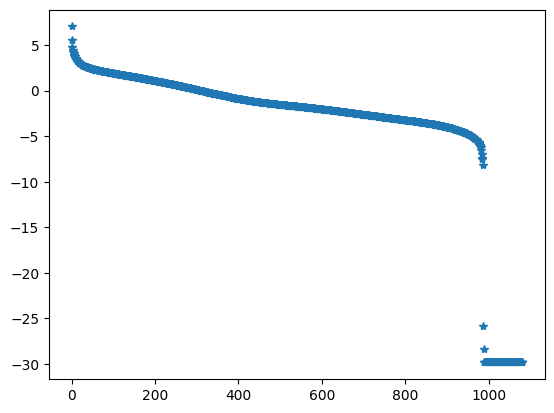

In [25]:
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')

In [26]:
# Imprimimos los valores singulares a partir del 900
for i in range(900,1082):
    print(i, np.log(S[i]), S[i])


900 -4.0212581747243945 0.01793039117663484
901 -4.040109485896432 0.017595545846049058
902 -4.046775827238153 0.017478638037971766
903 -4.057631024194045 0.01728993006369756
904 -4.063493770996479 0.01718886014467069
905 -4.0740225352154456 0.017008832088571645
906 -4.083315362933227 0.016851504085497352
907 -4.08628282713497 0.01680157197289765
908 -4.092079999315332 0.01670445214943306
909 -4.122739788082749 0.016200068828455216
910 -4.128495379219536 0.016107095670292053
911 -4.143712400694051 0.015863849087605672
912 -4.1575615634900025 0.015645662397841143
913 -4.1584623056740515 0.01563157603476514
914 -4.186630097788926 0.015197412471048225
915 -4.204833004177724 0.014923277986070523
916 -4.215628618469459 0.014763038530900496
917 -4.219012786528216 0.014713162369710764
918 -4.2335027716649565 0.014501506017619
919 -4.2631505008139685 0.014077880097934424
920 -4.269364142895368 0.013990676396608101
921 -4.274701687915784 0.013916199470265535
922 -4.29033829966037 0.013700289709

¿A partir de qué índice los valores singulares se vuelven muy pequeños?

Podemos eliminar los valores singulares a partir de $i= 987$ sin perder mucha información. Vamos a crear una nueva matriz $\Sigma'$ reemplazando los valores singulares más pequeños en la diagonal de $\Sigma$ por $0$.

In [50]:
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

k=987
S_trunc = truncateSigma(A, S, k)
print("Tamaño de la matriz Sigma truncada:", S_trunc.shape)

Tamaño de la matriz Sigma truncada: (1082, 2000)


Construímos una nueva imagen utilizando $\Sigma'$ en la factorización en valores singulares de $A$:
$$
A' = U \Sigma' V^t
$$

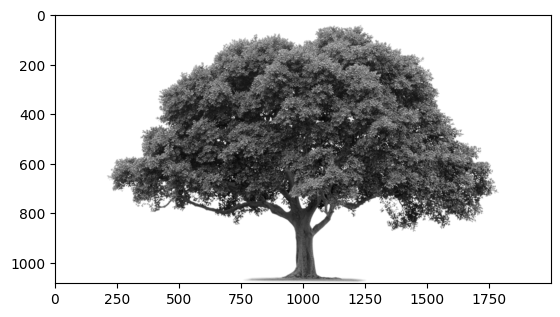

In [51]:
# Reconstruimos la imagen utilizando la nueva S
A_trunc = U@S_trunc@Vh
plt.imshow(A_trunc, cmap='gray')

Distancia entre matrices: 5.4957501496338096e-11
Error relativo: 4.622576731921625e-14


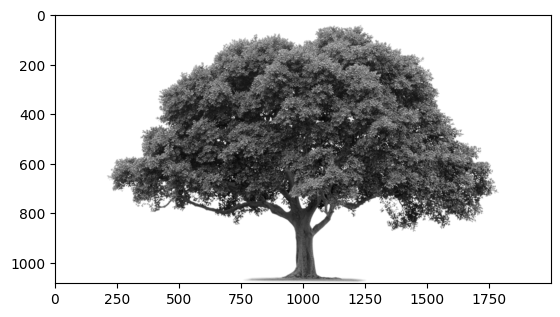

In [52]:
# Comparamos con la version original
plt.imshow(imgGray, cmap='gray')
print("Distancia entre matrices:", np.linalg.norm(A_trunc-A))
print("Error relativo:", np.linalg.norm(A_trunc-A)/np.linalg.norm(A))

Al reemplazar $\Sigma$ por $\Sigma'$, solo nos deshicimos de los valores singulares más pequeños pero seguimos guardando la misma cantidad de información. 

Recurrimos a la descomposición en valores singulares reducida. Nos quedamos con las primeras $987$ columnas de $U$ y $V$ respectivamente y nos quedamos con la submatriz diagonal de $987 \times 987$ de $\Sigma'$.

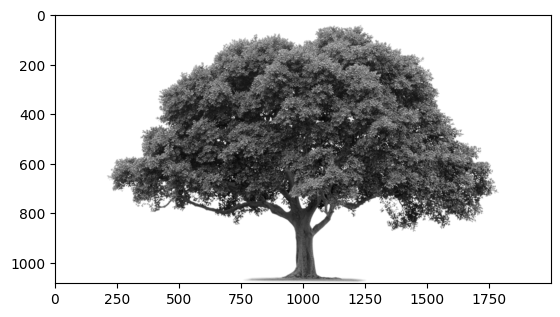

In [53]:
# Podemos construir A utilizando solo las primeras k columnas de U y k columnas de V (k filas de Vh)
# y tomando solo la submatriz de 987x987 de Sigma

k = 987
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

Nuestra nueva imagen es entonces $\bar{A} = \bar{U} \bar{\Sigma'} \bar{V^t}$, donde reducimos las dimensiones de $U$, $V^t$ y $\Sigma'$. Para comprobar que no se perdió información, calculamos
$$
\|A' - \bar{A}\|_2 = \|{U \Sigma' V^t - \bar{U} \bar{\Sigma'} \bar{V^t}}\|_2 .
$$

In [57]:
norm(A_trunc - A_zip)

1.075808168207512e-13

In [58]:
norm(U@S_trunc@Vh - U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,])

1.075808168207512e-13

¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición en valores singulares reducida? Calcular el porcentaje de compresión.

In [67]:
A.shape[0]*A.shape[1]

2164000

In [66]:
total = 0
for M in  [U[:,:k], S_trunc[:k,:k], Vh[:k,]]:
    x, y = M.shape
    total += x*y
total

4016103

Probemos eliminando una mayor cantidad de valores singulares. Nos quedamos con los primeros doscientos.

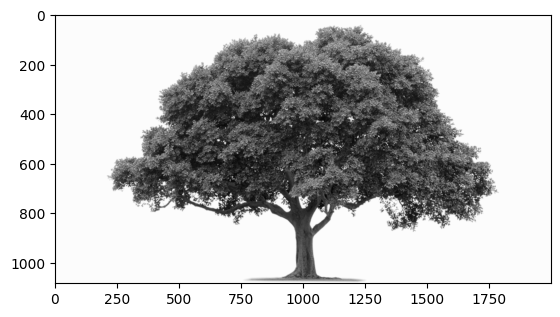

In [80]:
k = 500
A200 = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A200, cmap='gray')
#print("Distancia entre matrices: ", #completar)
#print("Error relativo:", #completar)

Notamos que el color blanco se volvió gris.

Pueden repetir estos pasos para el ejemplo `quijote.jpg` de la práctica, y así resolver los ejercicios 11 a 15.